In [ ]:
import pandas as pd

# Set the path to the CSV containing the dataset to train on.
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Set the column names for the columns in the CSV. If the CSV's first line is a header line containing
# the column names, then set this to None.
csv_columns = [
  "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status",
  "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
  "Hours-per-week", "Country", "Over-50K"]

# Read the dataset from the provided CSV and print out information about it.
df = pd.read_csv(csv_path, names=csv_columns, skipinitialspace=True)

df

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Over-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

categorical_features = ["Workclass", "Education", "Marital-Status", "Occupation", "Relationship", "Race", "Sex", "Country"]
category_mappings = {}
for feature in categorical_features:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])
    category_mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}
df['Over-50K'] = df['Over-50K'].map({'<=50K': 0, '>50K': 1})

# for feature, mapping in category_mappings.items():
#     fig, ax = plt.subplots(figsize=(5, 0.35 * len(mapping)))

#     table_data = [[label, code] for label, code in mapping.items()]
#     table = ax.table(cellText=table_data, colLabels=[feature, 'Encoded Label'], cellLoc = 'center', loc='center')
#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.scale(1.2, 1.2)

#     ax.axis('off')
#     ax.set_title(f'Label Encoding for {feature}')

#     plt.tight_layout()

#     plt.savefig(f'label_encoding_{feature}.png')
#     plt.close()

df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Over-50K
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

columns_to_drop = ['fnlwgt', 'Education', 'Over-50K']

X_dropped = df.drop(columns_to_drop, axis=1)
y = df['Over-50K']
X_train_dropped, X_test_dropped, y_train, y_test = train_test_split(X_dropped, y, test_size=0.2, random_state=57)

clf_dropped = RandomForestClassifier(n_estimators=1000, random_state=57)
clf_dropped.fit(X_train_dropped, y_train)

y_pred_dropped = clf_dropped.predict(X_test_dropped)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dropped)}")
print(classification_report(y_test, y_pred_dropped))

Accuracy: 0.8507600184246891
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4952
           1       0.71      0.63      0.67      1561

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



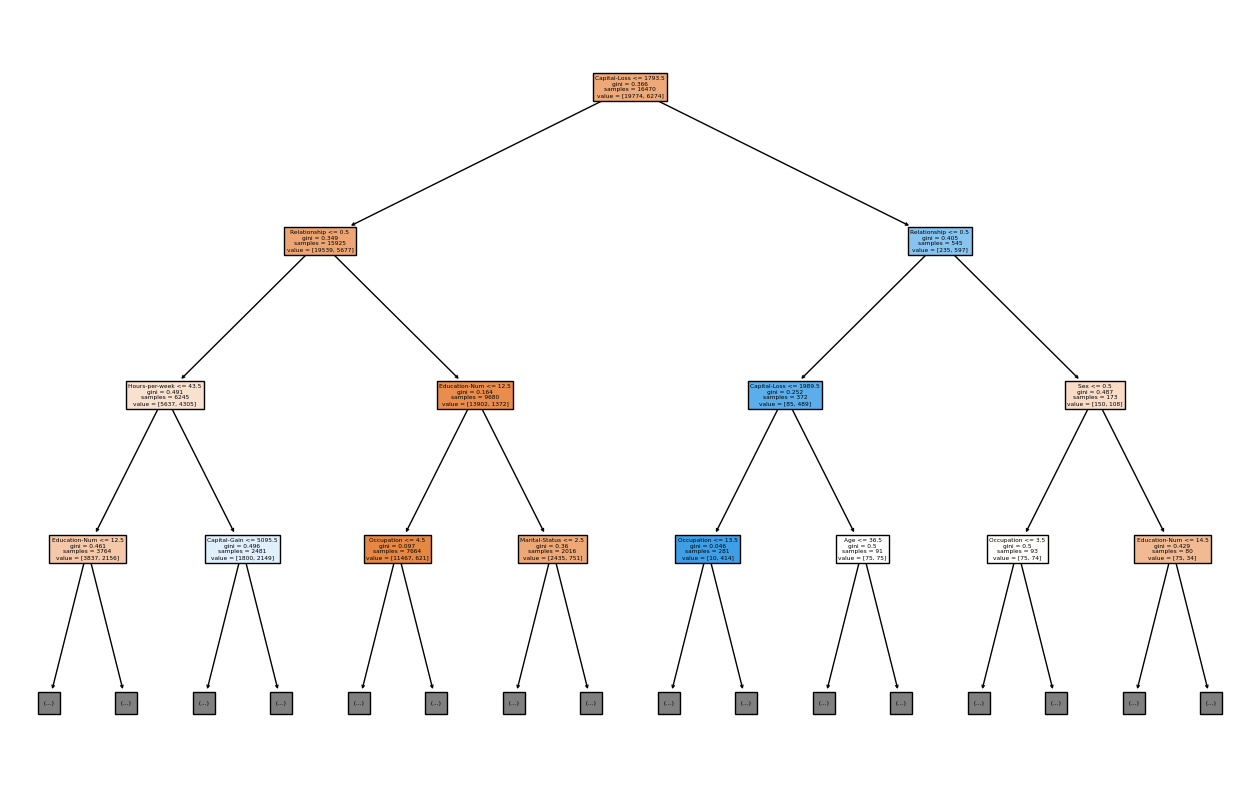

In [ ]:
from sklearn.tree import plot_tree

single_tree = clf_dropped.estimators_[0]

plt.figure(figsize=(16,10))
plot_tree(single_tree, feature_names=X_train_dropped.columns, filled=True, max_depth=3)
plt.show()

c:\Users\F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


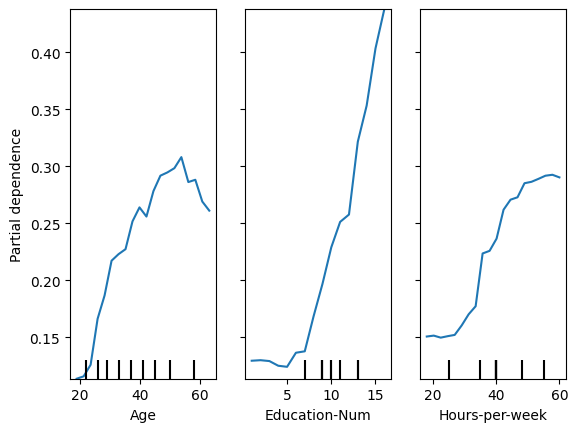

In [ ]:
from sklearn.inspection import plot_partial_dependence

features = ["Age", "Education-Num", "Hours-per-week"]
plot_partial_dependence(clf_dropped, X_train_dropped, features, grid_resolution=20)
plt.show()


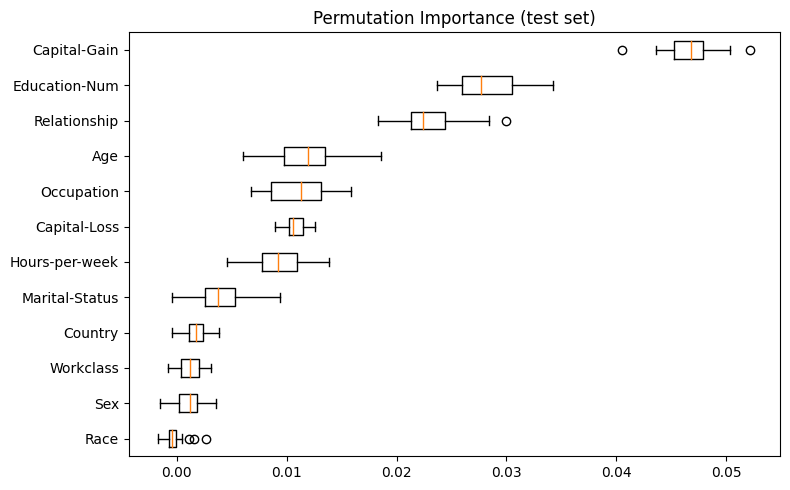

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf_dropped, X_test_dropped, y_test, n_repeats=30, random_state=57, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8, 5))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test_dropped.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dropped)
X_test_scaled = scaler.transform(X_test_dropped)


clf_logistic = LogisticRegression(max_iter=1000, random_state=57)
clf_logistic.fit(X_train_scaled, y_train)

y_pred_logistic = clf_logistic.predict(X_test_scaled)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8209734377399048
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4952
           1       0.71      0.43      0.54      1561

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513

Logistic Regression Accuracy: 0.8209734377399048
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4952
           1       0.71      0.43      0.54      1561

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513

           Feature  Coefficient
0              Age     0.463979
1        Workclass    -0.039818
2    Education-Num     0.854684
3   Marital-Status    -0.369316
4       Occupation     0.045125
5     Relationship    -0.194452
6             Race     0

In [ ]:
coefficients = clf_logistic.coef_[0]
features = X_dropped.columns
feature_importance = pd.DataFrame(features, columns=['Feature'])
feature_importance['Coefficient'] = coefficients
feature_importance

,Feature,Coefficient
0,Age,0.463979
1,Workclass,-0.039818
2,Education-Num,0.854684
3,Marital-Status,-0.369316
4,Occupation,0.045125
5,Relationship,-0.194452
6,Race,0.097431
7,Sex,0.420680
8,Capital-Gain,2.245555
9,Capital-Loss,0.269119


Added by Giorgos and Dimitris

In [ ]:
# Create new column in place of Country
df["in_USA"] = df.apply(lambda x: str(x["Country"]=='United-States'), axis=1)
df.drop('Country', axis=1, inplace=True)
df.head()

In [ ]:
!pip install fairlearn matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fairlearn.datasets import fetch_adult
data = fetch_adult(as_frame=True)
X = pd.get_dummies(data.data)
y_true = (data.target == '>50K') * 1
sex = data.data['sex']
sex.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [ ]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score,  precision_score

In [ ]:


from sklearn.tree import DecisionTreeClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=57)

classifier.fit(X, y_true)
y_pred = classifier.predict(X)
mf = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex)

sex
Female    0.999938
Male      0.999877
Name: accuracy_score, dtype: float64

In [ ]:
mf.overall

0.9998976290897179

In [ ]:
mf.by_group

sex
Female    0.999938
Male      0.999877
Name: accuracy_score, dtype: float64

In [ ]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
sr.overall

0.23926129151140413

In [ ]:
sr.by_group

sex
Female    0.109313
Male      0.303706
Name: selection_rate, dtype: float64

In [ ]:
!pip install matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix
# from fairlearn import matplotlib
# Define false positive rate
def false_positive_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) > 0 else 0

# Define false negative rate
def false_negative_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp) if (fn + tp) > 0 else 0

# Define selection rate
def selection_rate(y_pred):
    return np.mean(y_pred)

# Define count
def count(y_true):
    return len(y_true)

# Update your metrics dictionary with these functions
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": sr.by_group,
    "count": count,
}

from fairlearn.metrics import MetricFrame

metric_frame = MetricFrame(
    metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex
)

# For plotting
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)
